In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, confusion_matrix
from sklearn.model_selection import GridSearchCV
from pycaret.classification import *

In [2]:
# Configuración de estilo
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("viridis")

# =============================
# PARTE 1: Análisis Descriptivo
# =============================

## 1. Cargando y explorando los datos

In [3]:
data = pd.read_csv('../../bank-full.csv', sep=';')
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


## Mostrar información básica del dataset

In [4]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [5]:
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [6]:
data.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


## Resumen estadístico de variables numéricas

In [7]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


## 2. Visualización de Datos

## ---- Variables categóricas ----

In [8]:
cat_vars = data.select_dtypes(include=["object"]).columns
cat_vars

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y'],
      dtype='object')

Se encontraron 10 columnas categóricas para graficar.


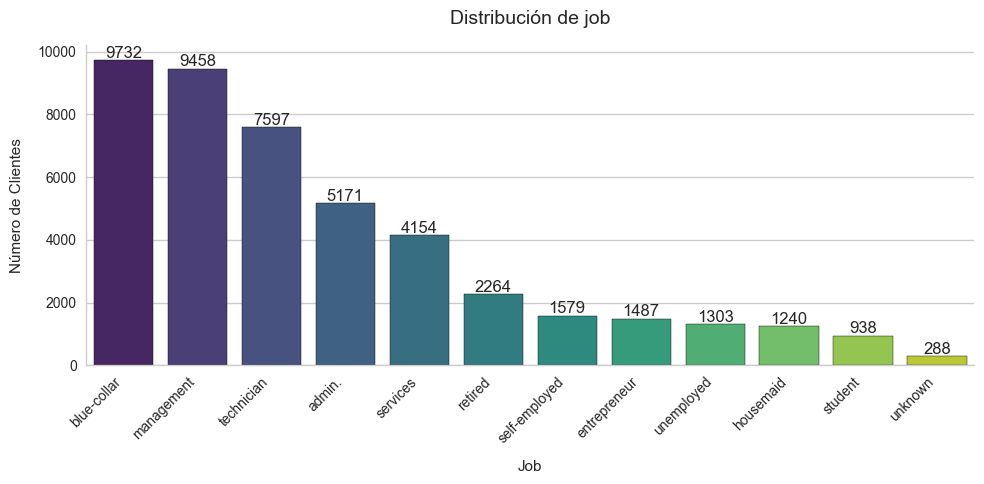

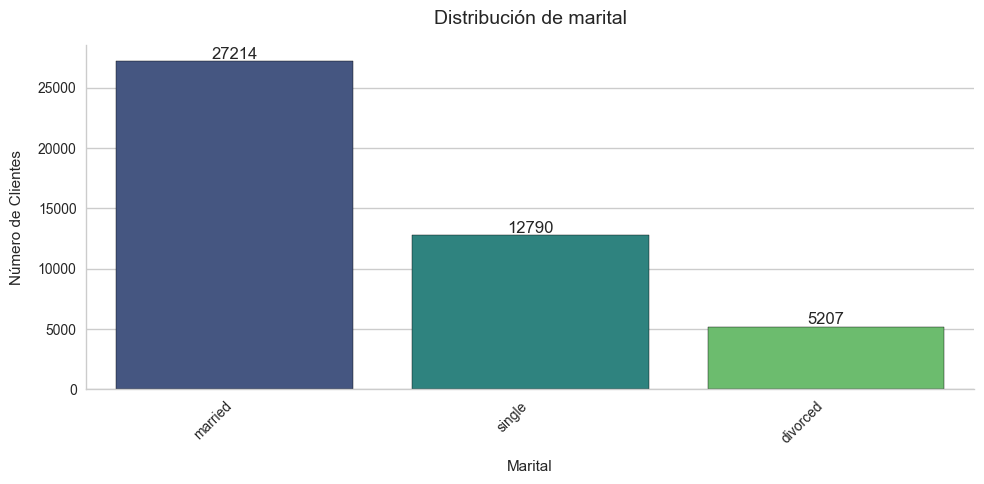

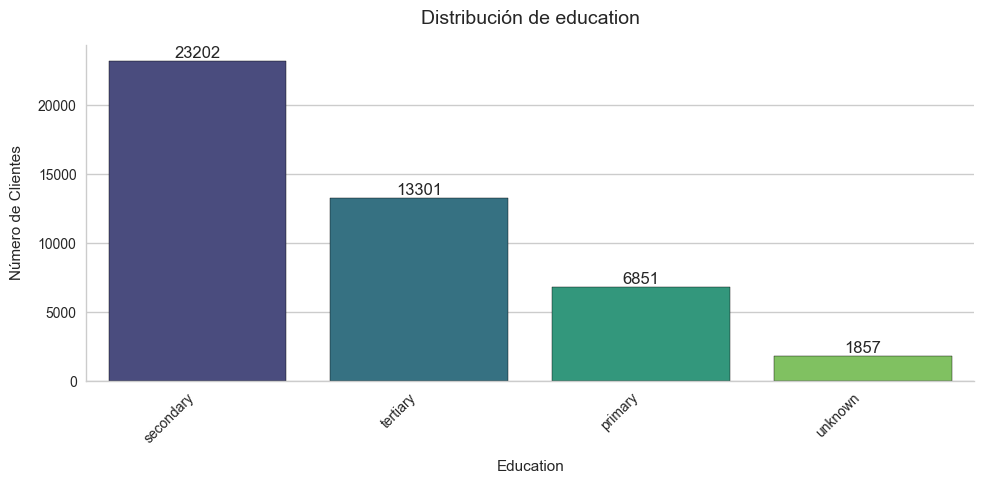

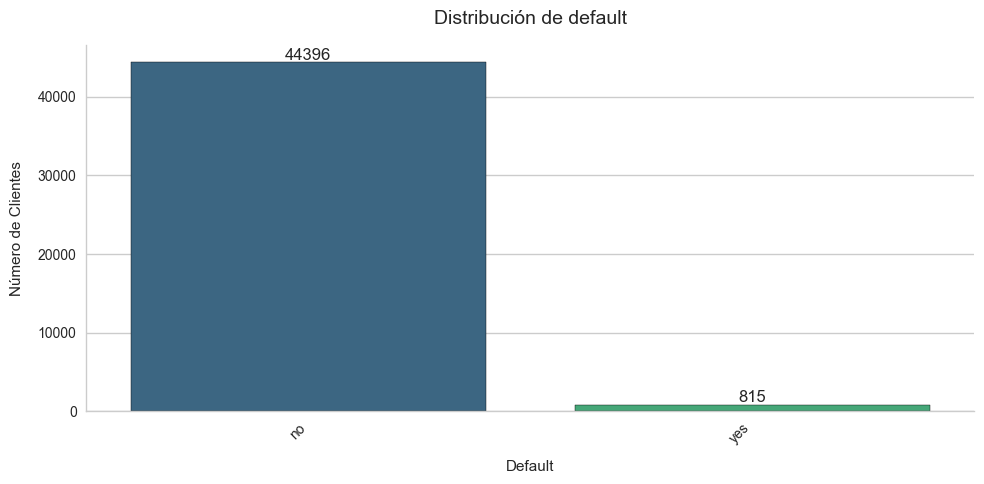

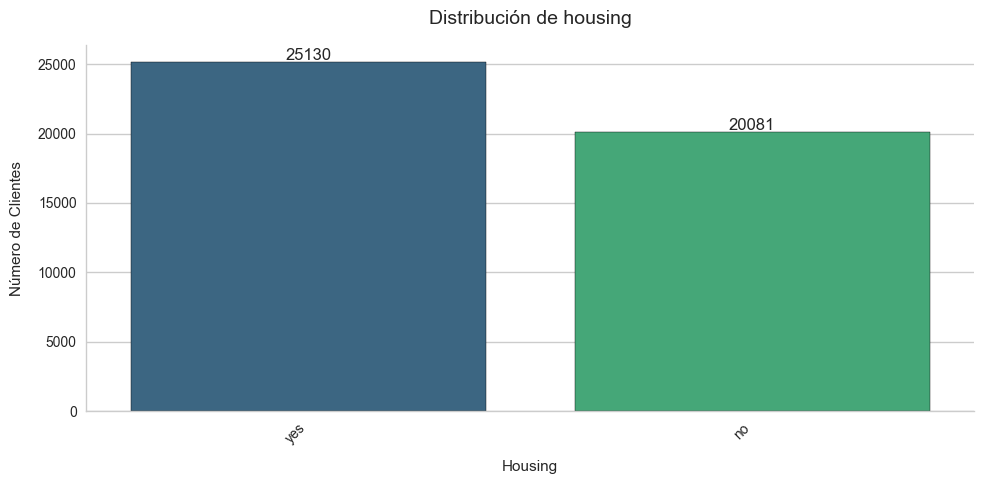

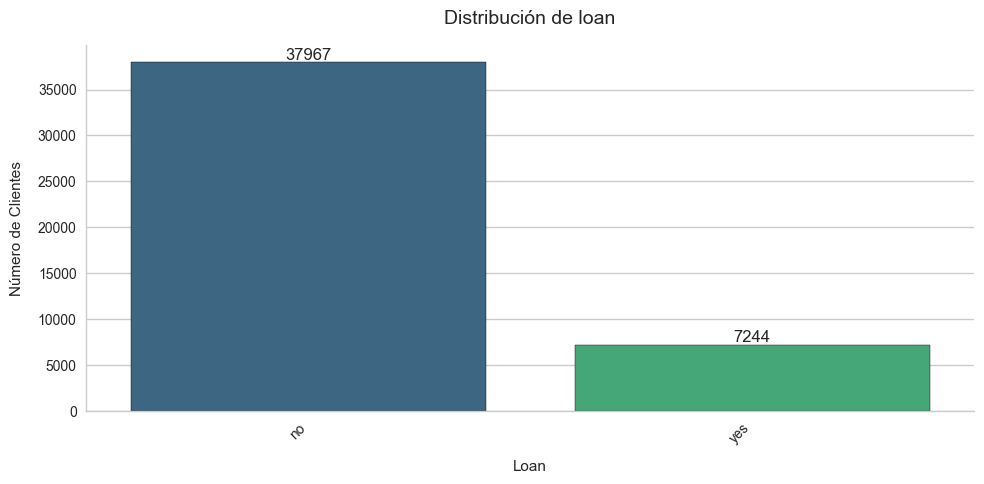

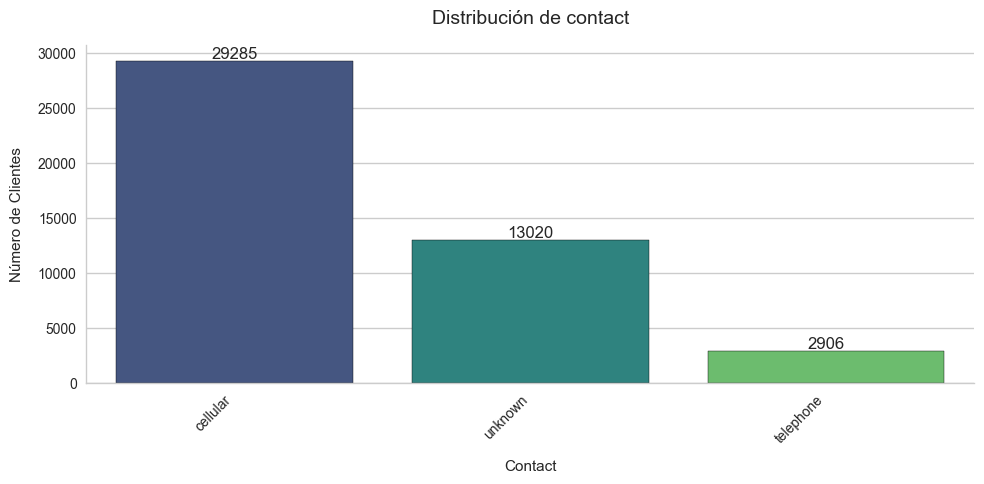

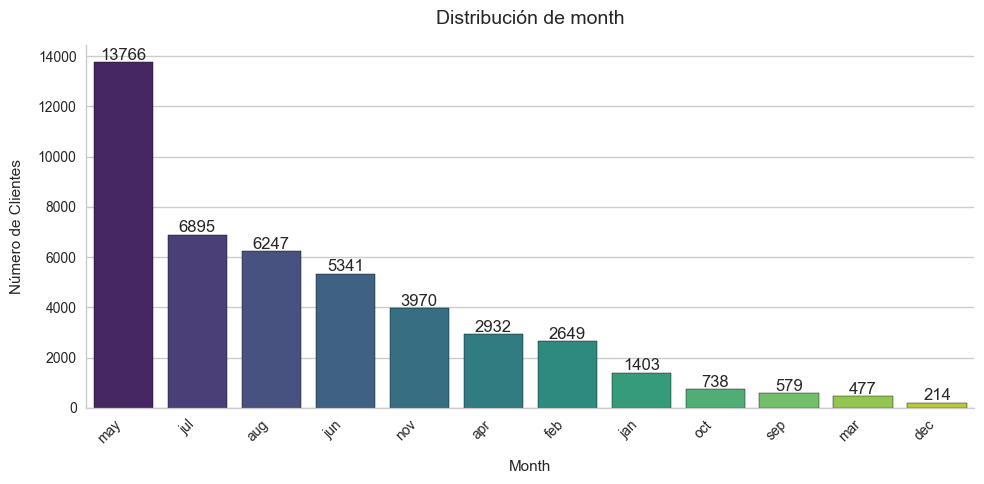

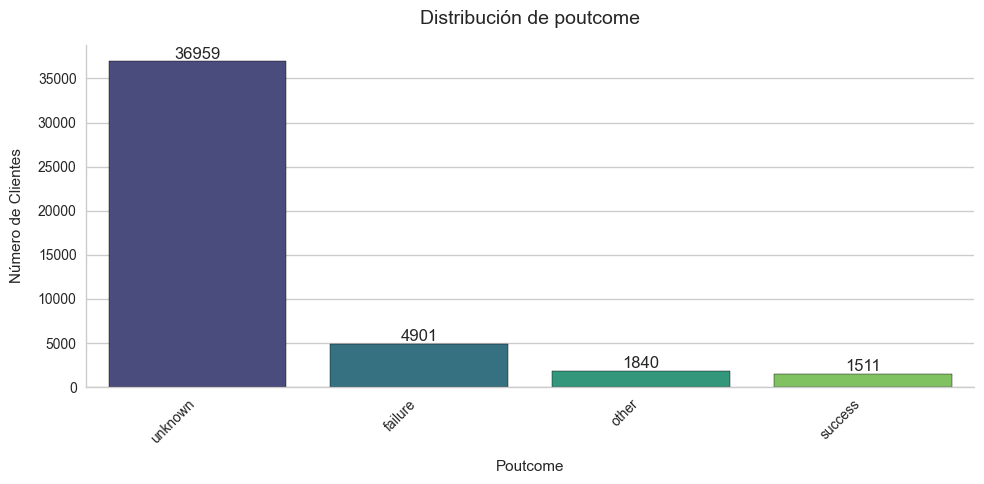

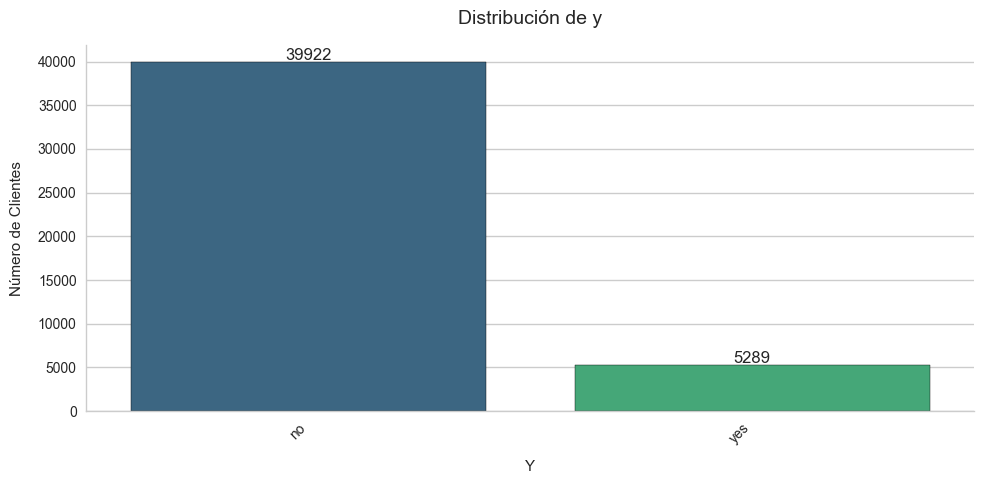

In [9]:
cat_vars = data.select_dtypes(include=["object"]).columns
# Verificar que tenemos columnas para graficar
if len(cat_vars) == 0:
    print("No se encontraron columnas categóricas. Verifica tus datos.")
else:
    print(f"Se encontraron {len(cat_vars)} columnas categóricas para graficar.")

# Mostrar los gráficos
for col in cat_vars:
    try:
        # Crear figura
        plt.figure(figsize=(10, 5))
        
        # Crear el gráfico
        ax = sns.countplot(
            x=col, 
            data=data, 
            order=data[col].value_counts().index,
            palette="viridis",
            edgecolor='black'
        )
        
        # Añadir título y etiquetas
        plt.title(f"Distribución de {col}", fontsize=14, pad=15)
        plt.xlabel(col.title(), labelpad=10)
        plt.ylabel("Número de Clientes", labelpad=10)
        
        # Rotar etiquetas del eje X
        plt.xticks(rotation=45, ha='right')
        
        # Añadir valores en las barras
        for p in ax.patches:
            ax.annotate(f'{p.get_height():.0f}', 
                       (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', 
                       xytext=(0, 5), 
                       textcoords='offset points')
        
        # Mejorar el diseño
        sns.despine()
        plt.tight_layout()
        plt.show()
        
    except Exception as e:
        print(f"Error al graficar {col}: {str(e)}")


## ---- Variables Numéricas ----

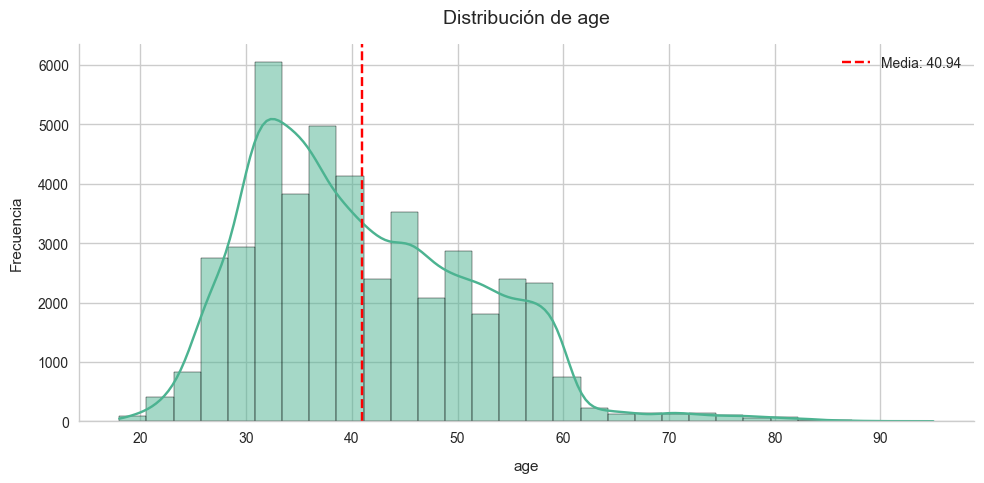


Estadísticas para age:
count    45211.000000
mean        40.936210
std         10.618762
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000




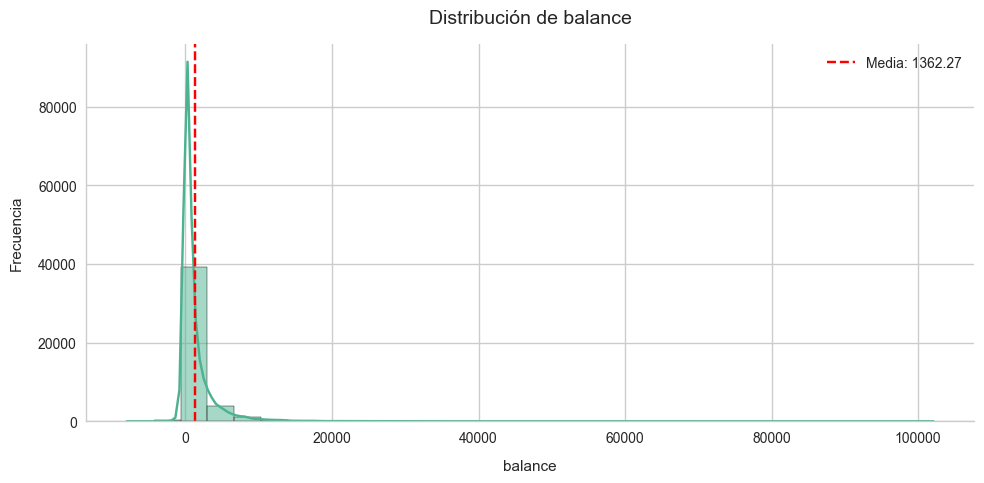


Estadísticas para balance:
count     45211.000000
mean       1362.272058
std        3044.765829
min       -8019.000000
25%          72.000000
50%         448.000000
75%        1428.000000
max      102127.000000




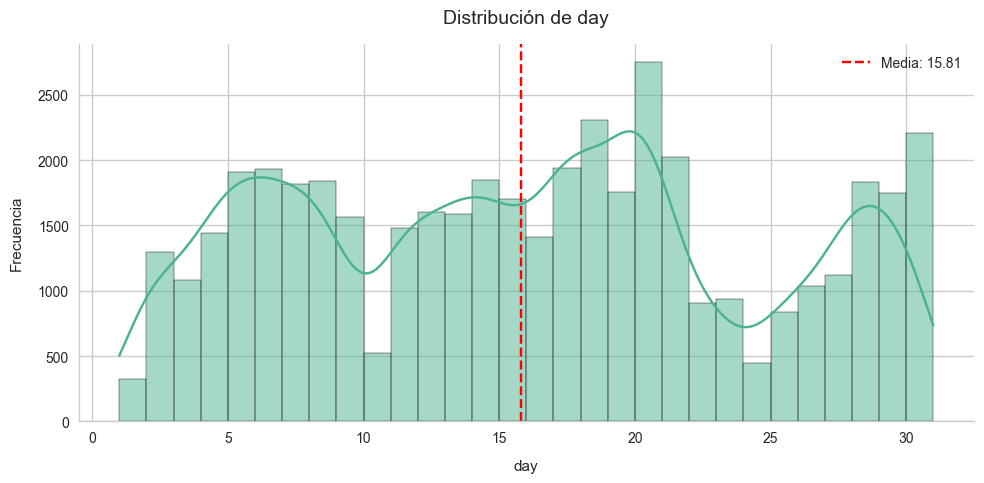


Estadísticas para day:
count    45211.000000
mean        15.806419
std          8.322476
min          1.000000
25%          8.000000
50%         16.000000
75%         21.000000
max         31.000000




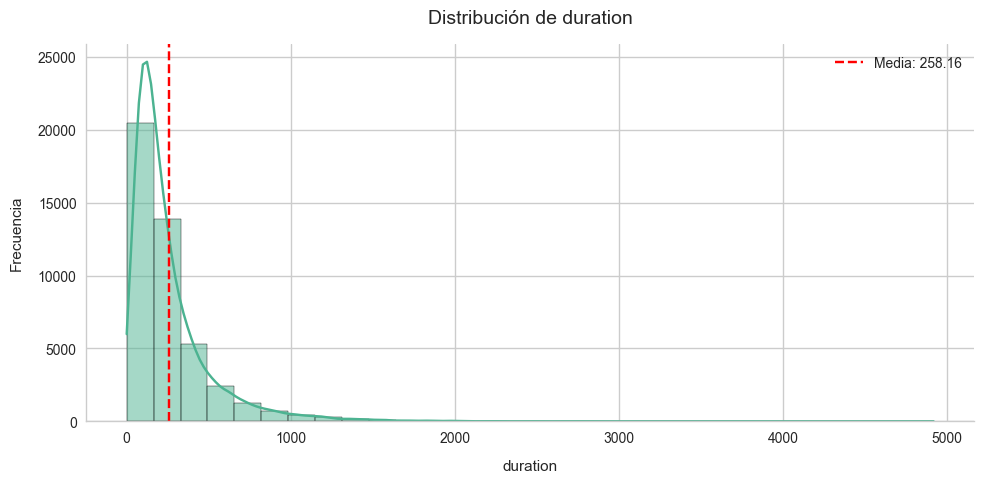


Estadísticas para duration:
count    45211.000000
mean       258.163080
std        257.527812
min          0.000000
25%        103.000000
50%        180.000000
75%        319.000000
max       4918.000000




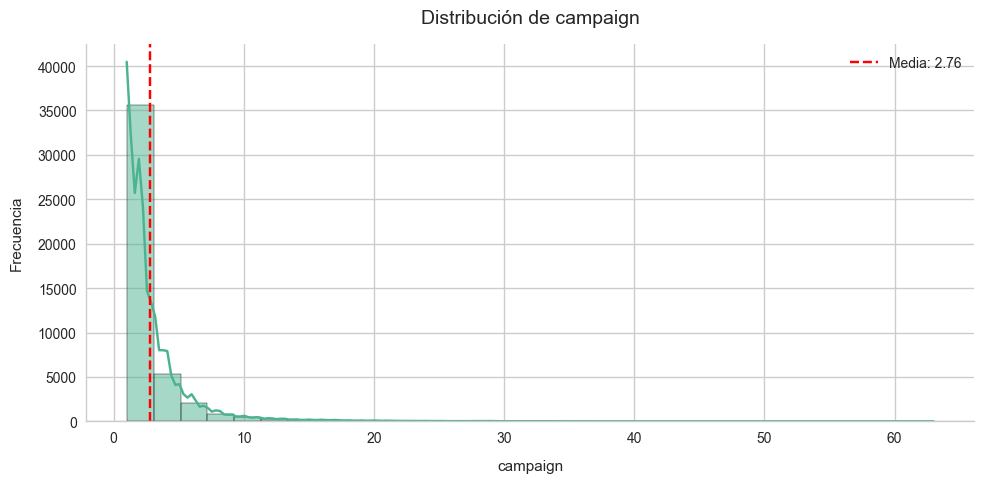


Estadísticas para campaign:
count    45211.000000
mean         2.763841
std          3.098021
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         63.000000




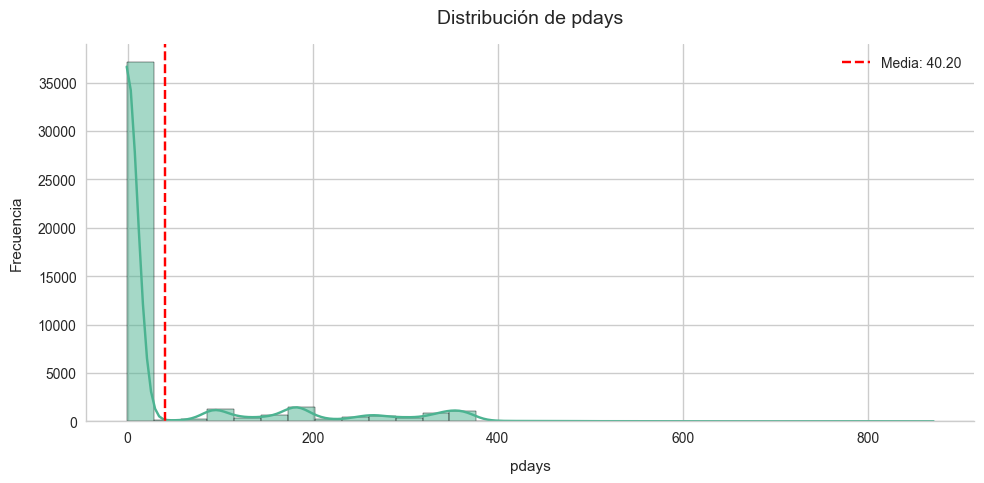


Estadísticas para pdays:
count    45211.000000
mean        40.197828
std        100.128746
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        871.000000




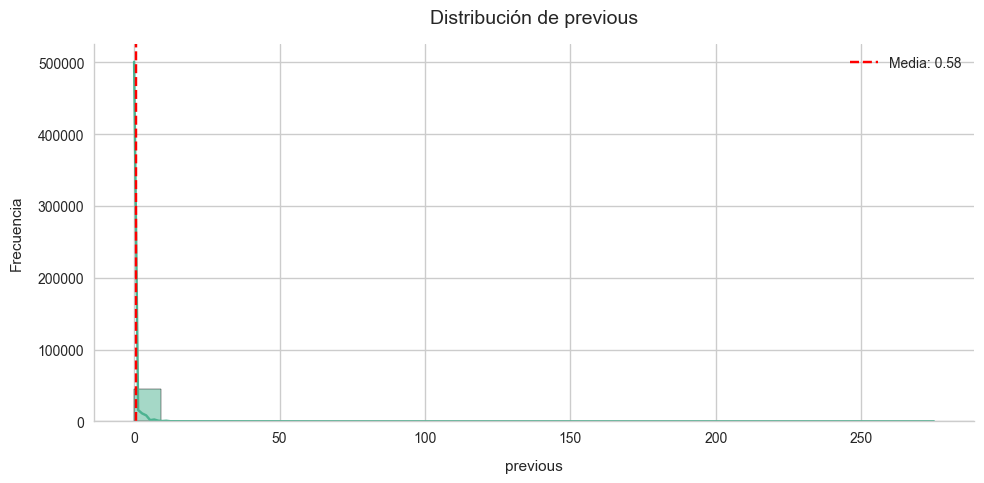


Estadísticas para previous:
count    45211.000000
mean         0.580323
std          2.303441
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        275.000000




In [10]:
num_vars = data.select_dtypes(include=["int64", "float64"]).columns

for var in num_vars:
    try:
        # Crear figura
        plt.figure(figsize=(10, 5))
        
        # Crear histograma con KDE
        sns.histplot(
            data=data, 
            x=var, 
            kde=True, 
            bins=30,
            color='#4CB391',
            edgecolor='black'
        )
        
        # Añadir título y etiquetas
        plt.title(f'Distribución de {var}', fontsize=14, pad=15)
        plt.xlabel(var, labelpad=10)
        plt.ylabel('Frecuencia', labelpad=10)
        
        # Añadir línea para la media
        mean_val = data[var].mean()
        plt.axvline(mean_val, color='red', linestyle='--', 
                   label=f'Media: {mean_val:.2f}')
        
        # Mejorar el diseño
        plt.legend()
        sns.despine()
        plt.tight_layout()
        plt.show()
        
        # Mostrar estadísticas resumidas
        print(f"\nEstadísticas para {var}:")
        print(data[var].describe().to_string())
        print("\n" + "="*50 + "\n")
        
    except Exception as e:
        print(f"Error al graficar {var}: {str(e)}")

## ---- Correlación ----

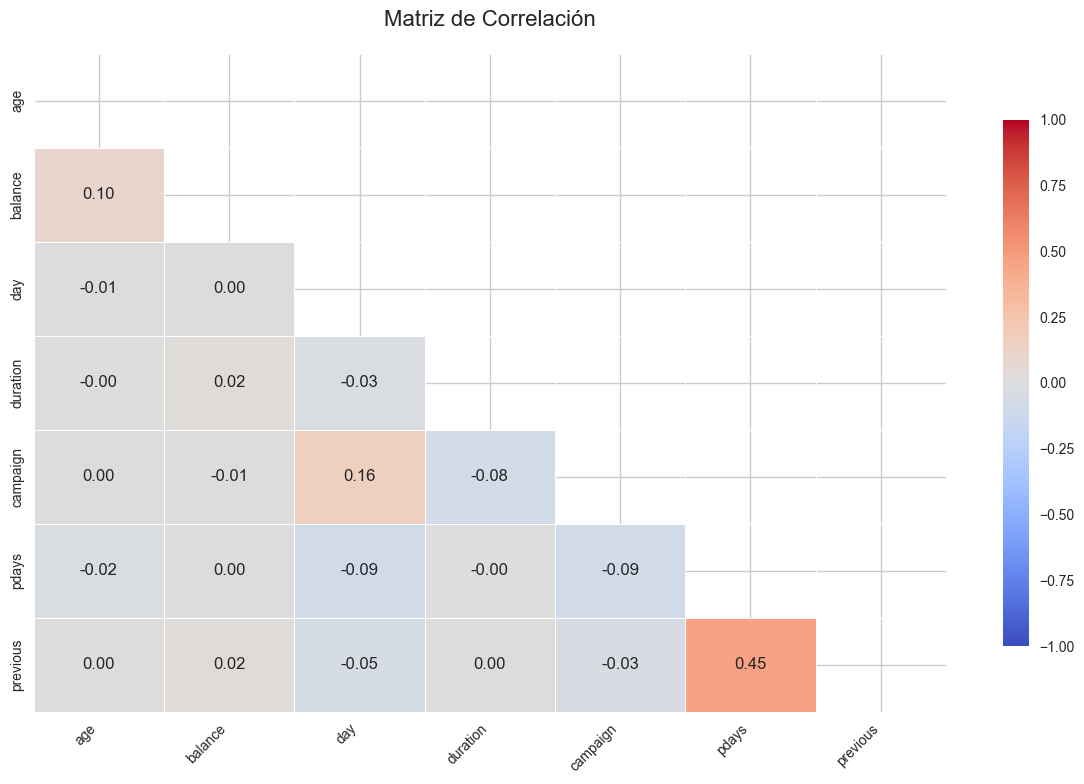

In [11]:
plt.figure(figsize=(12, 8))

# Calcular matriz de correlación
corr_matrix = data[num_vars].corr()

# Crear máscara para el triángulo superior
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Crear heatmap
sns.heatmap(
    corr_matrix, 
    mask=mask,
    annot=True, 
    cmap="coolwarm",
    fmt=".2f",
    vmin=-1, 
    vmax=1,
    linewidths=0.5,
    cbar_kws={"shrink": .8}
)

plt.title('Matriz de Correlación', fontsize=16, pad=20)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# =============================
# PARTE 2: Modelado Predictivo
# =============================

## Variable target: "y" (sí / no suscripción)

In [12]:
data['y'].value_counts()


y
no     39922
yes     5289
Name: count, dtype: int64

## Inicializar PyCaret

In [13]:
exp = setup(
    data=data, 
    target='y',
    session_id=123,
    normalize=True,
    use_gpu=False,
    verbose=False
)

## Comparar modelos de clasificación

In [14]:
best_model = compare_models(sort='AUC')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.9093,0.9372,0.9093,0.9012,0.9037,0.5092,0.5155,9.2680
lightgbm,Light Gradient Boosting Machine,0.9075,0.9355,0.9075,0.8998,0.9024,0.5049,0.5098,0.6380
xgboost,Extreme Gradient Boosting,0.9061,0.9305,0.9061,0.8983,0.9010,0.4979,0.5027,0.5650
rf,Random Forest Classifier,0.9048,0.9280,0.9048,0.8920,0.8935,0.4366,0.4565,1.8010
gbc,Gradient Boosting Classifier,0.9062,0.9256,0.9062,0.8949,0.8971,0.4629,0.4767,2.1370
ada,Ada Boost Classifier,0.8993,0.9113,0.8993,0.8855,0.8885,0.4142,0.4297,1.0150
et,Extra Trees Classifier,0.8994,0.9094,0.8994,0.8841,0.8861,0.3940,0.4158,1.7250
lr,Logistic Regression,0.9012,0.9073,0.9012,0.8864,0.8877,0.4007,0.4247,1.1890
ridge,Ridge Classifier,0.8995,0.9070,0.8995,0.8830,0.8809,0.3506,0.3899,0.3210
lda,Linear Discriminant Analysis,0.9006,0.9070,0.9006,0.8906,0.8938,0.4562,0.4632,0.3960


## Crear modelo final

In [15]:
final_model = finalize_model(best_model)

## Genera predicciones con validación cruzada

In [22]:
predictions = predict_model(final_model)
predictions

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,CatBoost Classifier,0.9437,0.9669,0.9437,0.9406,0.9401,0.6942,0.7034


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,prediction_label,prediction_score
5997,26,blue-collar,single,secondary,no,339,yes,no,unknown,26,may,165,5,-1,0,unknown,no,no,0.9980
39268,34,blue-collar,married,secondary,no,463,yes,no,cellular,18,may,11,11,360,4,failure,no,no,0.9998
9555,59,retired,married,secondary,no,444,yes,no,unknown,6,jun,137,1,-1,0,unknown,no,no,0.9985
9044,47,entrepreneur,married,secondary,no,0,no,no,unknown,5,jun,1446,1,-1,0,unknown,yes,yes,0.6381
42981,34,management,divorced,tertiary,no,2885,no,no,cellular,10,feb,314,2,156,4,other,yes,yes,0.7478
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39833,34,management,married,tertiary,no,690,yes,no,cellular,1,jun,95,2,-1,0,unknown,no,no,0.9283
32030,25,student,single,secondary,no,1765,yes,no,telephone,14,apr,111,3,326,2,failure,no,no,0.9911
4644,33,services,single,secondary,no,0,yes,no,unknown,20,may,134,3,-1,0,unknown,no,no,0.9991
4091,50,services,married,secondary,no,1463,yes,no,unknown,19,may,380,1,-1,0,unknown,no,no,0.9873


## Reporte detallado

In [ ]:
evaluate_model(final_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

## Curva ROC

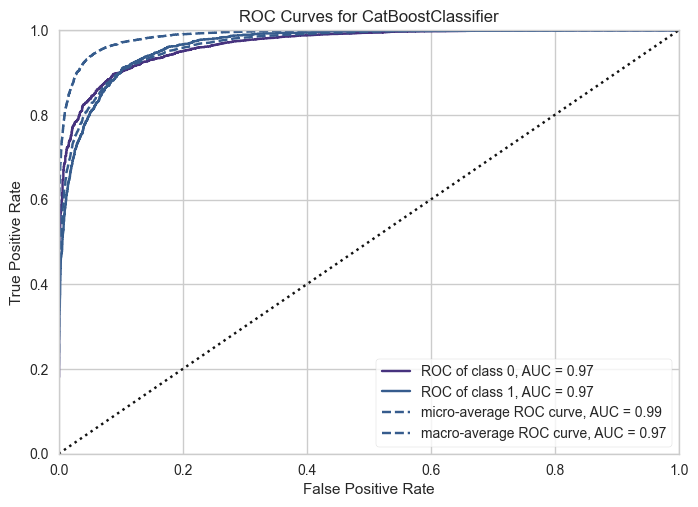

In [16]:
plot_model(final_model, plot='auc')

## Matriz de confusión

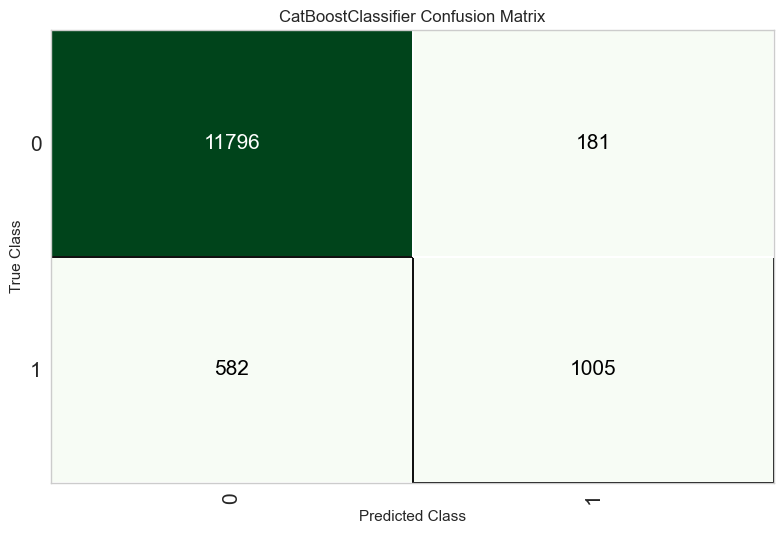

In [17]:
plot_model(final_model, plot='confusion_matrix')

## Importancia de variables

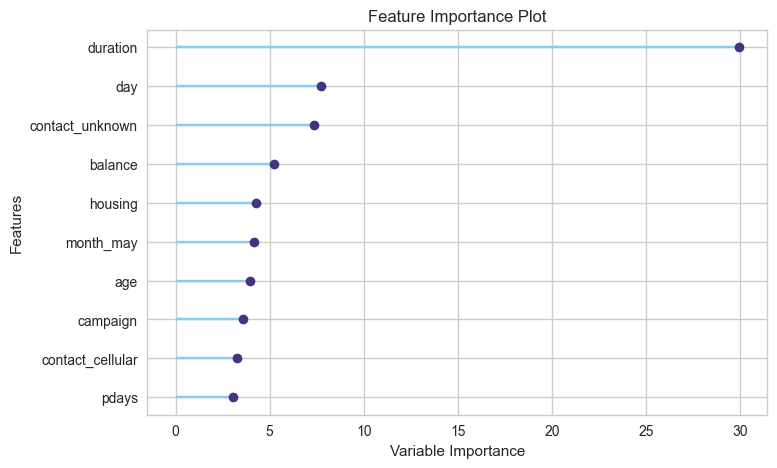

In [18]:
plot_model(final_model, plot='feature')

In [30]:
# Asumiendo que 'model' es tu modelo CatBoost ya entrenado
importance = final_model.get_feature_importance()
feature_names = final_model.feature_names_  # o data.columns si no está disponible

# Crear DataFrame
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importance
}).sort_values('Importance', ascending=False)

print(importance_df)

                Feature  Importance
40             duration   29.933283
27                  day    7.713910
25      contact_unknown    7.324476
21              balance    5.211202
22              housing    4.271674
31            month_may    4.159417
0                   age    3.956319
41             campaign    3.578935
24     contact_cellular    3.263366
42                pdays    3.072866
29            month_jun    2.967574
44     poutcome_success    2.871166
38            month_nov    2.040514
35            month_jul    2.034687
32            month_aug    1.886046
37            month_apr    1.575935
36            month_feb    1.267088
34            month_oct    1.065445
43             previous    1.012119
39            month_mar    0.920956
13      marital_married    0.796694
23                 loan    0.787943
30            month_jan    0.782192
16   education_tertiary    0.588980
3       job_blue-collar    0.580141
28            month_sep    0.572087
45     poutcome_unknown    0

## Curva Precision-Recall

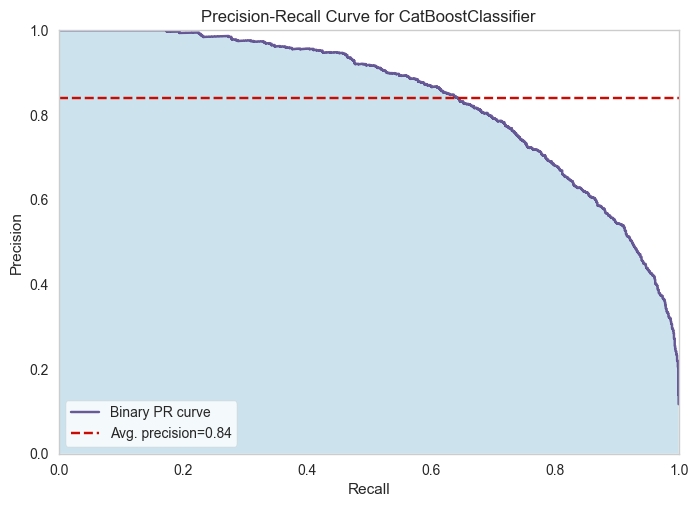

In [19]:
plot_model(final_model, plot='pr')


## Curva de aprendizaje

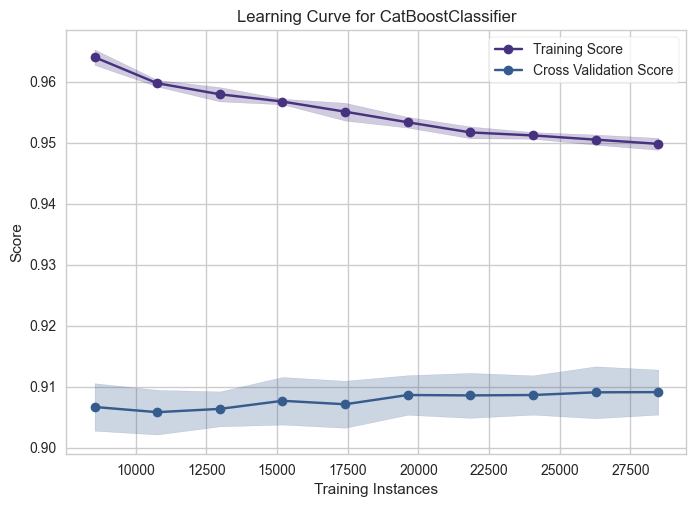

In [20]:
plot_model(final_model, plot='learning')

## Curva de validación

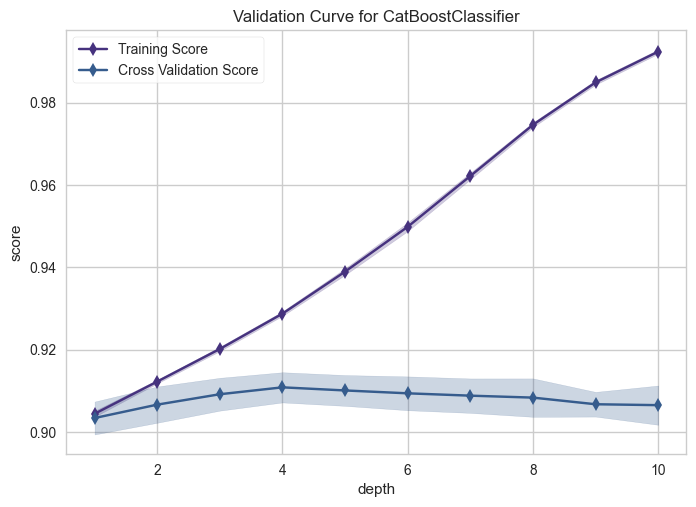

In [21]:
plot_model(final_model, plot='vc')